In [54]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_23/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


[<img src="https://www.digitalhouse.com/ar/logo-DH.png" width="400" height="200" align='right'>](http://digitalhouse.com.ar/)

# Regularización

### Nota:

En este ejercicio vamos a escalar las features del dataset usando `MinMaxScaler` con el objetivo de que tengan un ejercicio resuelto de ejemplo con una alternativa a `StandardScaler`, no porque consideremos que en este problema `MinMaxScaler` resulte en una mejor performance que `StandardScaler`.

---

Aunque la normalización a través de min-max es una técnica de uso común que es útil cuando necesitamos valores en un intervalo acotado, la estandarización puede ser más práctica para muchos algoritmos de aprendizaje automático. 

La razón es que muchos modelos lineales inicializan las ponderaciones en O o valores aleatorios pequeños cercanos a 0.

Usando la estandarización centramos las columnas de features en la media 0 con el desvío estándar 1, así las columnas de features adoptan la forma de una distribución normal, lo que facilita el aprendizaje de los pesos. 

Además, la estandarización mantiene información útil sobre los valores atípicos y hace que el algoritmo sea menos sensible a ellos en contraste con el escalado min-max, que escala los datos a un rango limitado de valores.


## Imports

In [55]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.tools import eval_measures


## Dataset

Este dataset contiene los precios y otros atributos de casi 54.000 diamantes.

Sus features son:

* **price**: price in US dollars (\$326--\$18,823).  **Esta es la variable target**.

* carat: weight of the diamond (0.2--5.01)

* cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* color: diamond colour, from J (worst) to D (best)

* clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* x: length in mm (0--10.74)

* y: width in mm (0--58.9)

* z: depth in mm (0--31.8)

* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* table: width of top of diamond relative to widest point (43--95)

Fuente: https://www.kaggle.com/shivam2503/diamonds

## Leemos los datos

In [56]:
data = pd.read_csv('../Data/diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [57]:
data.shape

(53940, 10)

## Ejercicio 1

Normalicemos las features y creemos las variables dummies necesarias para poder entrenar un modelo de regresión para predecir el valor de `price` para cada registro

https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

In [58]:
# Para las variables categoricas, tengo que hacer OneHotEncoding, para transformarlas en dummies
# Para las variables continuas, tengo que normalizarlas, para que esten en el rango entre [0-1].

from sklearn.preprocessing import OneHotEncoder

X_cat=data[['cut','color','clarity']]

enc_categorico = OneHotEncoder(drop='first')
categorical_dummies = enc_categorico.fit_transform(X_cat)
categorical_dummies

<53940x17 sparse matrix of type '<class 'numpy.float64'>'
	with 152694 stored elements in Compressed Sparse Row format>

In [59]:
categorical_dummies_df = pd.DataFrame(categorical_dummies.toarray())
categorical_dummies_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [60]:
# Ahora trabajamos sobre las variables continuas

from sklearn.preprocessing import MinMaxScaler

X_continua = data[['carat','depth','table','x','y','z']]

enc_cotinuo = MinMaxScaler()
data_normalizada = enc_cotinuo.fit_transform(X_continua)
data_normalizada

array([[0.00623701, 0.51388889, 0.23076923, 0.36778399, 0.06757216,
        0.07641509],
       [0.002079  , 0.46666667, 0.34615385, 0.36219739, 0.06519525,
        0.07264151],
       [0.00623701, 0.38611111, 0.42307692, 0.37709497, 0.06910017,
        0.07264151],
       ...,
       [0.1039501 , 0.55      , 0.32692308, 0.52700186, 0.09643463,
        0.11194969],
       [0.13721414, 0.5       , 0.28846154, 0.5726257 , 0.10390492,
        0.11761006],
       [0.11434511, 0.53333333, 0.23076923, 0.54283054, 0.09966044,
        0.11446541]])

In [61]:
data_normalizada_df = pd.DataFrame(data_normalizada, columns=X_continua.columns+'_normalizada')
data_normalizada_df

,carat_normalizada,depth_normalizada,table_normalizada,x_normalizada,y_normalizada,z_normalizada
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478
...,...,...,...,...,...,...
53935,0.108108,0.494444,0.269231,0.535382,0.097793,0.110063
53936,0.108108,0.558333,0.230769,0.529795,0.097623,0.113522
53937,0.103950,0.550000,0.326923,0.527002,0.096435,0.111950
53938,0.137214,0.500000,0.288462,0.572626,0.103905,0.117610


In [62]:
# Ahora unimos ambos data frame, para trabajar con ese set de datos

X = pd.concat([data_normalizada_df,categorical_dummies_df], axis=1)
X.head(3)

,carat_normalizada,depth_normalizada,table_normalizada,x_normalizada,y_normalizada,z_normalizada,0,1,2,3,...,7,8,9,10,11,12,13,14,15,16
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [65]:
y = data['price']

Otra opción es usar `get_dummies`

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [66]:
dummies=pd.get_dummies(X, drop_first=True)
dummies.head(3)

,carat_normalizada,depth_normalizada,table_normalizada,x_normalizada,y_normalizada,z_normalizada,0,1,2,3,...,7,8,9,10,11,12,13,14,15,16
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Ejercicio 2

Separemos el conjunto en train y test

In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 117)

## Ejercicio 3

Ajustemos una regresión lineal múltiple con los datos del conjunto de entrenamiento usando statsmodels y evaluemos la significancia de cada uno de los coeficientes

In [75]:
import statsmodels.api as sm
from statsmodels.tools import eval_measures

X_train_sm = sm.add_constant(X_train)# Creo una constante para decirle al modelo que no esta obligado a cortar en 0 al eje y

model = sm.OLS(y_train, X_train_sm).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.896e+04
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:21:36   Log-Likelihood:            -3.1890e+05
No. Observations:               37758   AIC:                         6.379e+05
Df Residuals:                   37734   BIC:                         6.381e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               605.6677    197.624      3.065      0.002     218.319     993.017
carat_normalizada  5.448e+04    278.733    195.441      0.000    5.39e+04     5.5e+04
depth_normalizada -2276.1992    190.657    -11.939      0.000   -2649.893   -1902.505
table_normalizada -1462.4308    180.744     -8.091      0.000   -1816.693   -1108.168
x_normalizada     -1.094e+04    385.496    -28.384      0.000   -1.17e+04   -1.02e+04
y_normalizada      -420.6904   1142.612     -0.368      0.713   -2660.241    1818.860
z_normalizada     -1292.3376   1113.978     -1.160      0.246   -3475.765     891.090
0                   587.5927     39.948     14.709      0.000     509.294     665.891
1                   829.0476     39.667     20.900      0.000     751.299     906.796
2                   774.2104     38.335     20.196      0.000     699.072     849.349
3                   743.0087     38.300     19.400      0.000     667.940     818.078
4                  -226.0425     21.320    -10.602      0.000    -267.830    -184.255
5                  -282.8884     21.535    -13.137      0.000    -325.097    -240.680
6                  -499.0250     21.074    -23.679      0.000    -540.331    -457.719
7                 -1003.0732     22.435    -44.711      0.000   -1047.046    -959.101
8                 -1490.7890     25.157    -59.260      0.000   -1540.097   -1441.481
9                 -2380.4588     31.001    -76.787      0.000   -2441.221   -2319.696
10                 5413.2716     61.065     88.648      0.000    5293.583    5532.960
11                 3717.5451     52.300     71.081      0.000    3615.035    3820.055
12                 2754.5243     52.503     52.464      0.000    2651.616    2857.432
13                 4637.5990     53.388     86.866      0.000    4532.957    4742.241
14                 4321.1516     52.574     82.191      0.000    4218.105    4424.199
15                 5083.5105     56.464     90.030      0.000    4972.839    5194.182
16                 5021.3881     54.958     91.368      0.000    4913.670    5129.107
==============================================================================
Omnibus:                    10637.428   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           310890.318
Skew:                           0.747   Prob(JB):                         0.00
Kurtosis:                      16.978   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion: Observamos que los p-value de y_normalizada y z_normalizada, son muy altos, y por tanto no son estadisticamente significativos, no podemos asegurar que sus coeficientes beta, no son 0, esto quiere decir, que no podemos assegurar que haya una correlacion entre la variable target y estas dos variables

Vamos a intentar solucionar estre problema, utilizando **regularizacion**

In [77]:
sm_prediction_train = model.predict(X_train_sm)
print(eval_measures.rmse(y_train, sm_prediction_train))

X_test_sm = sm.add_constant(X_test)
sm_prediction_test = model.predict(X_test_sm)
print(eval_measures.rmse(y_test, sm_prediction_test))

1126.6429803257492
1137.7066896840538


## Ejercicio 4

Ajustamos el modelo aplicando regularización de Lasso y validación cruzada para estimar el mejor valor de $\alpha$ para este problema

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

¿Cuál es el mejor valor de $\alpha$ para este problema?

¿Cuál es el score obtenido ($R^2$) para este modelo en entrenamiento?

In [81]:
from sklearn.linear_model import LassoCV

lmlassocv = LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10], cv=5, normalize = False)

modelcv = lmlassocv.fit(X_train, y_train)

print(modelcv.score(X_train,y_train))

print(modelcv.alpha_)

0.9203445764331188
0.05


In [87]:
no_reg_model_params = model.params

## Ejercicio 5 

Ajustemos los datos de entrenamiento con una regresión con regularización de Lasso para el valor de $\alpha$ calculado en el punto anterior usando statsmodels.

Usemos scatterplots para mostrar 

* los valores de los coeficientes de la regresión lineal múltiple obtenidos en el Ejercicio 3, y los valores de los coeficientes de la regresión lineal con regularización de Lasso para el modelo entrenado.

* los valores de los residuos en entrenamiento resultado del Ejercicio 3, y los residuos en entrenamiento para el modelo con regularización.

https://www.statsmodels.org/0.6.1/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html

In [98]:
best_alpha = modelcv.alpha_

#L1_wt : 0, the fit is ridge regression. 1, the fit is the lasso 

no_reg_model = sm.OLS(y_train, X_train_sm)

reg_model = no_reg_model.fit_regularized(alpha = best_alpha, L1_wt = 1)

In [99]:
 reg_model.params

const                 2028.705746
carat_normalizada    40301.655655
depth_normalizada    -8055.541752
table_normalizada    -4669.494594
x_normalizada         1760.041231
y_normalizada           52.107994
z_normalizada         1824.760609
0                      408.439420
1                      388.436100
2                      399.336250
3                      455.645636
4                     -289.061997
5                     -378.010827
6                     -563.307037
7                    -1029.372688
8                    -1464.653475
9                    -2320.159582
10                    2919.980513
11                    1148.583253
12                     211.661349
13                    2072.715648
14                    1776.976453
15                    2621.203392
16                    2511.508715
dtype: float64

<AxesSubplot:>

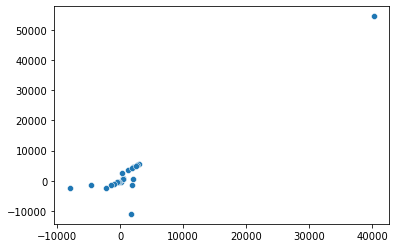

In [100]:
%matplotlib inline
sns.scatterplot(x=reg_model.params, y=no_reg_model_params)

<AxesSubplot:>

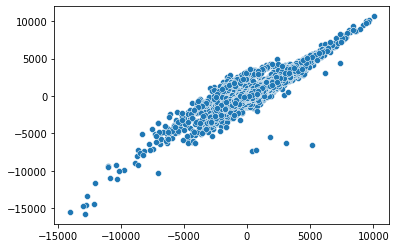

In [101]:
reg_residuals = y_train - reg_model.fittedvalues

linear_residuals = y_train - model.fittedvalues

sns.scatterplot(x = reg_residuals, y = linear_residuals)

## Ejercicio 6

Usandos statsmodels y scikit-learn calculemos la performance en test del modelo construído y comparemos los resultados de las dos bibliotecas usando como métricas el error absoluto medio (MAE) y la raiz del error cuadrático medio (RMSE) 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

Métricas en `statsmodels`

https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.rmse.html

https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.meanabs.html

Métricas en `scikit-learn`

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

## Referencias

https://www.kaggle.com/yogendran/intro-to-linear-ridge-and-lasso-regressions
    
https://towardsdatascience.com/intro-to-regularization-with-ridge-and-lasso-regression-with-sklearn-edcf4c117b7a